# 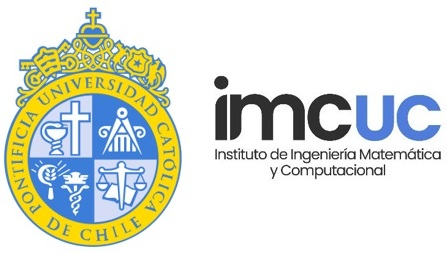  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 07: Extracción de datos online - URL y API</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la lectura de datos desde la Web.


## 1. Introducción.

Las organizaciones y gobiernos generan y almacenan datos a través de distintos métodos y herramientas de software, cada uno con sus propios formatos y ubicaciones. El proceso Extracción, Transformación y Carga (o ETL por su acrónimo en inglés) se refiere al desarrollo de pipelines para la integración, estructuración y almacenamiento de datos provenientes de múltiples fuentes. 

La primera etapa, la de **extracción**, implica identificar las fuentes de datos requeridas (software, IoT, datos de clientes, RRSS, web analytics, etc.) y el formato de dichos datos. Esto para luego obtener en forma automatizada los datos desde la fuente original, hacia un repositorio temporal donde se realizan la  **transformación**. Esta segunda etapa se refiere a la conversión de los datos en un formato y estructura apropiada para el análisis y modelamiento.

## 2. Extracción de Datos.

Los datos de interés para un problema de ciencia de datos pueden estar ubicados en diversas fuentes: archivos en almacenamiento local o remoto, servidores de bases de datos, y la web. La clase pasada vimos que hay tres formas principales para comenzar a usar esos datos:
- URL
- API
- Scrapping.

En la web, la transmisión de información se realiza mediante el protocolo HTTP (Hypertext Transfer Protocol), diseñado para la comunicación entre los navegadores y servidores web. Sigue el clásico modelo cliente-servidor, en el que un cliente establece una conexión, realizando una petición a un servidor y espera una respuesta del mismo.

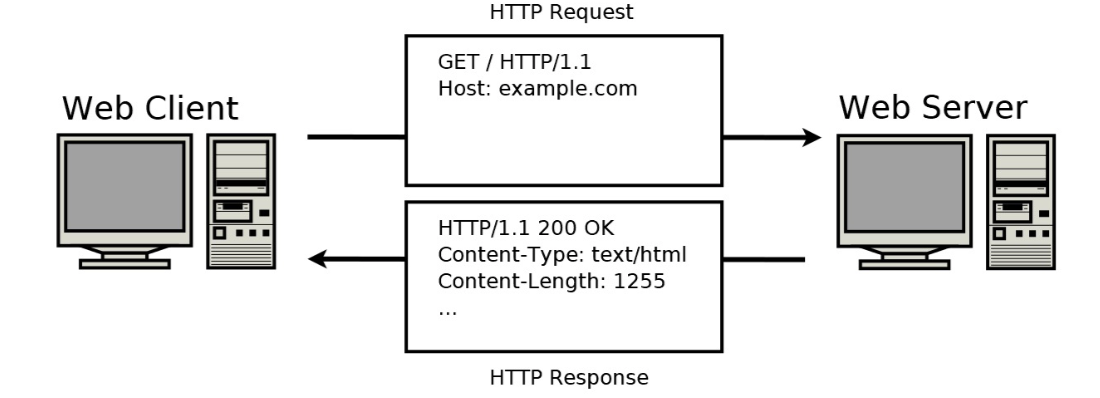

HTTP y HTTPS definen un conjunto de métodos de petición para indicar la acción que se desea realizar para un recurso determinado. Los dos métodos más usados en nuestro contexto son GET y POST:

- `GET`: el método GET  solicita una representación de un recurso específico. Las peticiones que usan el método GET sólo deben recuperar datos.
- `POST`: el método POST se utiliza para enviar una entidad a un recurso en específico, causando a menudo un cambio en el estado o efectos secundarios en el servidor.

En este ejercicio, exploraremos distintas formas de extraer datos desde la WWW, utilizando la librería de Python llamada `requests`, para enviar peticiones HTTP a un servidor (como por ejemplo pedir datos con el método GET), y recoger la respuesta en un objeto tipo `response`, que implementa métodos y atributos para leer y explorar los datos extraídos. 

La documentación se encuentra en el siguiente link:

https://docs.python-requests.org/en/latest/api/#requests.Response

Siempre que se hace un llamado a `requests.get()`, está ocurriendo dos cosas importantes. Primero, se está construyendo un objeto tipo `request`, el cual será enviado a un servidor con el fin de obtener información de éste. Segundo, un objeto `response` es generado una vez que requests obtenga una respuesta del servidor. Este nuevo objeto contiene toda la información entregada por el servidor, incluídos los datos en formato binario, así como el objeto `request` que fue creado originalmente.

## 3. Extraccion por URL

Frecuentemente, los datos que necesitamos están publicados en alguna dirección web or URL (Universal Resource Locator). Podemos descargarlos fácilmente navegando hacia dicha URL y haciendo click en un link, pero esto supone limitaciones de reproducibilidad y escalabilidad: por ejemplo, si queremos descargar muchos archivos o si queremos actualizar nuestra base de datos cada cierta cantidad de minutos o días.
 
Para automatizar el proceso, podemos utilizar códigos de Python para importar y guardar localmente datasets de la WWW, y convertirlos en DataFrames de pandas, usando la librería  `requests`. También es posible usar `pandas` directamente para leer algunos tipos de archivos mediante su URL como vimos en clases.

In [1]:
# librerías para URL
import pandas as pd
import requests
import io, zipfile

### 3.1 Leer contenido de un archivo directamente desde su URL usando `pandas`.

En el caso de archivos en formato CSV o de Excel, podemos leer esos archivos directamente usando métodos implementados en la librería de Pandas. Veamos el siguiente ejemplo que nos permite acceder al repositorio del Gobierno de Chile y obtener el dato de todos los putnos de carga de tarjetas Bip!.

En este caso la planilla tiene 9 filas de formato y orden, por lo que podemos saltarnos esas filas para almacenar los datos realmente necesarios en nuestro DataFrame.

In [2]:
#url del archivo
url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20210901_oficio-4770_2013.xlsx'

#leer datos y crear un dataframe. Si se trata de un archivo en formato csv, usar pd.read_csv (o la función correspondiente al formato del archivo)
datos = pd.read_excel(url, skiprows=9)
datos.head(12)

,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCIÓN,COMUNA,HORARIO REFERENCIAL,ESTE,NORTE,LONGITUD,LATITUD
0,424,Fullcarga,EL RINCON DEL GUSTO,CERRO BLANCO 625,MAIPU,NaN,334307,6288070,-70.784993,-33.534428
1,1224,Fullcarga,MARION,LOS DURAZNOS 356 A,ESTACION CENTRAL,NaN,341056,6295687,-70.710417,-33.466487
2,3316,Fullcarga,NISSY,JOAQUIN EDWARDS BELLO 10999,LA PINTANA,NaN,349448,6285070,-70.622688,-33.563602
3,9878,Fullcarga,ERICHOPER,LOS RETAMOS 5615,HUECHURABA,NaN,349062,6305684,-70.623182,-33.377799
4,10347,Fullcarga,DON ORLANDO,ARTURO PRAT 5725 DPTO 11,RENCA,NaN,338912,6302602,-70.732990,-33.404000
5,10489,Fullcarga,NOLBERTO VALDES NAVARRO,CALLE 462 5994,PEÑALOLEN,NaN,354320,6291989,-70.568331,-33.501720
6,10767,Fullcarga,BAZAR LA KUKA,AV. RECOLETA 4021,RECOLETA,NaN,347250,6304432,-70.642299,-33.388429
7,11267,Fullcarga,DAVICITO,LOS PLATANOS 1214,CERRO NAVIA,NaN,338922,6299319,-70.732721,-33.433431
8,11377,Fullcarga,ELSA ROSA REYES YANEZ,EL PILLAN 10858,LA PINTANA,NaN,349862,6285409,-70.617412,-33.560429
9,12214,Fullcarga,ATEMIS COMPUTACION,GABRIELA PONIENTE 519,PUENTE ALTO,NaN,352713,6283332,-70.587625,-33.579838


### 3.2 Descargar un archivo directamente desde su URL usando `requests`.

Otra opción que podemos usar, y que permite acceder a todo tipo de formatos, es usando la librería `requests`. En este caso, el método `.get()` nos permite el acceso a los datos en una URL.

In [3]:
#lo mismo que hicimos antes, pero ahora usando Requests para solicitar el recurso y guardarlo en el disco local
url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20210901_oficio-4770_2013.xlsx'
respuesta = requests.get(url,stream=False)

In [4]:
#la respuesta a la solicitud queda almacenada en un objeto tipo Response
respuesta

<Response [200]>

In [5]:
#el atributo r.content tiene el contenido del archivo
respuesta.content

b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

Ahora podemos almacenar los datos recogidos en un archivo local, como lo vimos en la clase pasada.

In [6]:
#escribimos el contenido del objeto reponse en un archivo local en su computador
open('puntosBip.xlsx', 'wb').write(respuesta.content)

#leemos el archivo local usando pandas
df = pd.read_excel('puntosBip.xlsx', engine='openpyxl',skiprows=9)
df

,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCIÓN,COMUNA,HORARIO REFERENCIAL,ESTE,NORTE,LONGITUD,LATITUD
0,424,Fullcarga,EL RINCON DEL GUSTO,CERRO BLANCO 625,MAIPU,NaN,334307,6288070,-70.784993,-33.534428
1,1224,Fullcarga,MARION,LOS DURAZNOS 356 A,ESTACION CENTRAL,NaN,341056,6295687,-70.710417,-33.466487
2,3316,Fullcarga,NISSY,JOAQUIN EDWARDS BELLO 10999,LA PINTANA,NaN,349448,6285070,-70.622688,-33.563602
3,9878,Fullcarga,ERICHOPER,LOS RETAMOS 5615,HUECHURABA,NaN,349062,6305684,-70.623182,-33.377799
4,10347,Fullcarga,DON ORLANDO,ARTURO PRAT 5725 DPTO 11,RENCA,NaN,338912,6302602,-70.732990,-33.404000
...,...,...,...,...,...,...,...,...,...,...
1597,122918,Fullcarga,DONDE VICTOR,LA ESTRELLA 791,PUDAHUEL,NaN,337014,6298062,-70.753456,-33.444359
1598,122938,Fullcarga,DANA MARKET,PEDRO LAGOS 1181,SANTIAGO,NaN,346735,6295799,-70.649306,-33.466311
1599,122948,Fullcarga,OXXO - FELIX BULNES,MAPOCHO 7366,CERRO NAVIA,NaN,338235,6300441,-70.739914,-33.423208
1600,122971,Fullcarga,MARANATHA 2,GALVARINO 1594,CERRO NAVIA,NaN,337932,6300111,-70.743226,-33.426136


En general puede ser más útil usar requests para descargar datos en formatos que no son leíbles directamente con `pandas`, pues en esos casos puede ser mejor usar directamente esta librería para leer y transformar a un DataFrame en forma más rápida.

Otro caso común, es tener los datos almacenados en un archivo comprimido en formato `zip`. También existe una librería en Python, llamaa `io` que permite automatizar procesos de lectura de este tipo de archivos.

Por ejemplo, los microdatos del censo 2017 están publicados como un archivo binario comprimido (.zip). Los podemos descargar usando `requests`, pero luego lo debemos abrir como un objeto tipo byte usando la librería `io`.

Finalmente, descomprimimos usando `zipfile`: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

In [7]:
# dirección de los microdatos del censo 2017, que están publicados en formato comprimido .zip
url ='http://www.censo2017.cl/descargas/microdatos/Censo2017_ManzanaEntidad_CSV.zip'

respuesta = requests.get(url, stream=True)

# Este dataset está en un archivo binario comprimido. Lo abrimos primero como un objeto tipo byte usando la librería io
archivoZip = zipfile.ZipFile(io.BytesIO(respuesta.content))

# Luego descomprimimos usando zipfile: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects
archivoZip.extractall()

In [8]:
%ls Censo2017_16R_ManzanaEntidad_CSV

 Volume in drive C is Local Disk
 Volume Serial Number is 46E6-2CA0

 Directory of C:\Users\rodri\OneDrive\Personal\UC\courses\IMC pregrado\imt2200 introducci¢n a ciencia de datos\lectures\clase 07\Censo2017_16R_ManzanaEntidad_CSV

08/29/2023  08:08 AM    <DIR>          .
08/31/2023  10:10 AM    <DIR>          ..
08/29/2023  08:08 AM    <DIR>          Censo2017_Identificaci¢n_Geogr fica
08/31/2023  10:11 AM        31,537,620 Censo2017_Manzanas.csv
08/31/2023  10:11 AM            16,288 LEAME.docx
               2 File(s)     31,553,908 bytes
               3 Dir(s)  145,589,575,680 bytes free


Ahora podemos abrir el archivo descargado y descomprimido. En este caso está en formato CSV que ya sabemos leer usando Pandas.

In [9]:
dat_manz = pd.read_csv('Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv',delimiter=';')
print(dat_manz.head())

   REGION  PROVINCIA  COMUNA  DC  AREA  ZC_LOC  MZ_ENT  ID_ZONA_LOC  \
0       1         11    1101   1     1       1       1         7849   
1       1         11    1101   1     1       1      10         7849   
2       1         11    1101   1     1       1      11         7849   
3       1         11    1101   1     1       1      12         7849   
4       1         11    1101   1     1       1      13         7849   

      ID_MANZENT  PERSONAS  ... MATREC MATIRREC P05_1 P05_2 P05_3 P05_4  \
0  1101011001001        15  ...      0        0     0     0     0     0   
1  1101011001010        70  ...      1        0    15     0     0     0   
2  1101011001011        36  ...      5        0    15     0     0     0   
3  1101011001012        65  ...      9        4    24     0     0     0   
4  1101011001013        39  ...      0        0     9     0     0     0   

  REGION_15R PROVINCIA_15R  COMUNA_15R  ID_MANZENT_15R  
0          1            11        1101   1101011001001  
1       

Tratemos de hacer lo mismo ahora con la base de datos abierta de películas que está disponible en https://www.omdbapi.com/.

In [10]:
url = 'http://www.omdbapi.com/?t=adventure&y=1945'
respuesta = requests.get(url)

In [11]:
datos = respuesta.json()
datos

{'Response': 'False', 'Error': 'No API key provided.'}

## 4. API

Una API es un conjunto de protocolos y rutinas que define cómo una aplicación (o programa) se comunica con otros programas, y vice-versa, pudiendo estar uno de esos programas en un lugar remoto.

Una forma standard de transferir data a través de una API es mediante el format JSON (acrónimo de JavaScript Object Notation) que ya hemos ocupado en el curso. Es un formato interpretable por humanos, y puede ser manejado mediante la librería `json` de Python como han hecho en clases anteriores.

Para obtener data de una API, debemos enviar una solicitud o "request". En este caso, el método `requests.get()` recibe el string de una URL desde donde obtener datos, y argumentos opcionales (keywords) útiles para trabajar con APIs hay tres elementos que nos interesan:
- `url`: dirección del recurso, más un string de query o consulta escrito de acuerdo a la documentación de cada API.
- `params`: permite entregar un diccionario con nombres y valores de parámetros para personalizar peticiones a la API.
- `headers`: también corresponde a un diccionario de cabeceras HTTP pasadas a la API, por ejemplo para autenticación del usuario.

El resultado es un objeto `response`, que contiene los datos y la metadata. El método `response.json()` permite acceder solamente a los datos.

### 4.1 API Open Notify ¿Cuántas personas hay en el espacio hoy?

Open Notify es proyecto que permite acceder, vía API, a algunos de los datos públicos de disponibiliza NASA.

En este caso, usaremos la API de Open Notify que entrega información actualizada de la ubicación de la Estación Espacial Internacional (ISS), y de las personas que están en el espacio.

http://open-notify.org/Open-Notify-API/People-In-Space/

Esta es una API muy sencilla, que no tiene argumentos. Por lo tanto, la consulta que se le enviá es siempre la misma.

In [12]:
url = 'http://api.open-notify.org/astros.json'

respuesta = requests.get(url)

In [13]:
respuesta.json()

{'number': 10,
 'people': [{'name': 'Sergey Prokopyev', 'craft': 'ISS'},
  {'name': 'Dmitry Petelin', 'craft': 'ISS'},
  {'name': 'Frank Rubio', 'craft': 'ISS'},
  {'name': 'Stephen Bowen', 'craft': 'ISS'},
  {'name': 'Warren Hoburg', 'craft': 'ISS'},
  {'name': 'Sultan Alneyadi', 'craft': 'ISS'},
  {'name': 'Andrey Fedyaev', 'craft': 'ISS'},
  {'name': 'Jing Haiping', 'craft': 'Tiangong'},
  {'name': 'Gui Haichow', 'craft': 'Tiangong'},
  {'name': 'Zhu Yangzhu', 'craft': 'Tiangong'}],
 'message': 'success'}

In [14]:
df = pd.json_normalize(respuesta.json(), record_path='people')
df

,name,craft
0,Sergey Prokopyev,ISS
1,Dmitry Petelin,ISS
2,Frank Rubio,ISS
3,Stephen Bowen,ISS
4,Warren Hoburg,ISS
5,Sultan Alneyadi,ISS
6,Andrey Fedyaev,ISS
7,Jing Haiping,Tiangong
8,Gui Haichow,Tiangong
9,Zhu Yangzhu,Tiangong


In [15]:
# ¿Dónde está la ISS ahora?
url = 'http://api.open-notify.org/iss-now.json'
respuesta = requests.get(url)
print(respuesta.json())

{'message': 'success', 'iss_position': {'longitude': '-28.2257', 'latitude': '-32.7203'}, 'timestamp': 1693491427}


In [16]:
# veamos uns segundos más tarde:
url = 'http://api.open-notify.org/iss-now.json'
respuesta = requests.get(url)
print(respuesta.json())

{'message': 'success', 'iss_position': {'longitude': '-27.9366', 'latitude': '-32.9597'}, 'timestamp': 1693491432}


### 4.2 API Yelp Fusion ¿Dónde puedo comer en Santiago?

Hay APIs más complejas, por ejemplo, la aplicación Yelp permite a los usuarios calificar y enviar comentarios sobre distintos negocios, y disponibiliza esta información mediante un conjunto de APIs.

https://docs.developer.yelp.com/docs/fusion-intro

Para conectarse a estas APIs, se requiere una clave privada de autentificación (gratuita), que puede ser creada siguiendo las instrucciones en:

https://docs.developer.yelp.com/docs/fusion-authentication

En esje ejmplo, usaremos la API *Businesses Search* para obtenre un listado de restaurants en la ciudad de Santiago. La información requerida para hacer la búsqueda está disponible en:

https://docs.developer.yelp.com/reference/v3_business_search

Una característica importante de la API, es que entrega un máximo de 1000 resultados. Además, cada query tiene un límite de 50 resultados. Por lo tanto, es necesario iterar y realizar varias queries para obtener el máximo de 1000 registros. Para esto, se utiliza el parámetro `offset`, que permite ir avanzando en la lista.

In [17]:
#url de la API
api_url = 'https://api.yelp.com/v3/businesses/search'

#estos datos corresponden a una cuenta de usuario creada previamente
clientid = 'lRChVnERbH4c0P5qIgpImg'
apikey = '60_w04sPkpcahed3Ax5uxeUJfIQXucu0O6ETfk6BjwfZsfmivrKhb1xcbuvJpLnf3649_ph6abR94oGjQe9iBiWz2lizZd9K8krZl6JU6Yf05K7dAQEnm4Ed76vsZHYx'
headers = {'Authorization':'Bearer %s'%apikey}

In [18]:
params = {'term':'restaurants','location':'RM Santiago, Chile','limit':50}
response = requests.get(api_url,params=params,headers=headers)
data = response.json()
#print(data)
data.keys()
data['businesses']

[{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
  'alias': 'barrica-94-santiago',
  'name': 'Barrica 94',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/QXbJCQglsDKGTaCOkmcvIA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=lRChVnERbH4c0P5qIgpImg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=lRChVnERbH4c0P5qIgpImg',
  'review_count': 77,
  'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
   {'alias': 'chilean', 'title': 'Chilean'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
  'rating': 4.5,
  'coordinates': {'latitude': -33.4342880070125,
   'longitude': -70.6352240592241},
  'transactions': [],
  'price': '$$',
  'location': {'address1': 'Bellavista 052',
   'address2': '',
   'address3': '',
   'city': 'Santiago',
   'zip_code': '8320000',
   'country': 'CL',
   'state': 'RM',
   'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},
  'phone': '+5627324939',
  'display_

In [19]:
data['total']

2200

La data entregada por la API de Yelp es un objeto en formato JSON anidado, es decir, un diccionario donde algunos de los valores de atributos corresponden a su vez a listas o diccionarios.

Como vimos anteriormente, podemos llevar estos datos a un formato "aplanado" o "flattened", utilizando la función `json_normalize()` :

https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

In [20]:
data['businesses'][0]

{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
 'alias': 'barrica-94-santiago',
 'name': 'Barrica 94',
 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/QXbJCQglsDKGTaCOkmcvIA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=lRChVnERbH4c0P5qIgpImg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=lRChVnERbH4c0P5qIgpImg',
 'review_count': 77,
 'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
  {'alias': 'chilean', 'title': 'Chilean'},
  {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
 'rating': 4.5,
 'coordinates': {'latitude': -33.4342880070125,
  'longitude': -70.6352240592241},
 'transactions': [],
 'price': '$$',
 'location': {'address1': 'Bellavista 052',
  'address2': '',
  'address3': '',
  'city': 'Santiago',
  'zip_code': '8320000',
  'country': 'CL',
  'state': 'RM',
  'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},
 'phone': '+5627324939',
 'display_phone': '+56 27324939',
 

In [21]:
#normalizamos el contenido del diccionario "businesses"
rests = pd.json_normalize(data["businesses"], sep='_', record_path=['categories'], meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']], errors='ignore')

rests

,alias,title,name,price,rating,review_count,distance,coordinates_latitude,coordinates_longitude,location_address1
0,wine_bars,Wine Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
1,chilean,Chilean,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
2,cocktailbars,Cocktail Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
3,seafood,Seafood,Aquí Está Coco,$$$$,4.5,57,2366.370671,-33.424063,-70.616624,La Concepción 236
4,latin,Latin American,Restaurant Peumayén,$$$$,4.5,70,1504.86354,-33.432807,-70.634821,Constitución 136
...,...,...,...,...,...,...,...,...,...,...
78,bars,Bars,Tramonto Bar,$$$$,4.0,5,5250.819179,-33.40256,-70.59845,NOI Vitacura
79,chilean,Chilean,Tramonto Bar,$$$$,4.0,5,5250.819179,-33.40256,-70.59845,NOI Vitacura
80,bars,Bars,Jardin Mallinkrodt,NaN,4.5,3,1493.497872,-33.43241,-70.63373,Mallinkrodt 170
81,foodtrucks,Food Trucks,Jardin Mallinkrodt,NaN,4.5,3,1493.497872,-33.43241,-70.63373,Mallinkrodt 170


In [22]:
rests

,alias,title,name,price,rating,review_count,distance,coordinates_latitude,coordinates_longitude,location_address1
0,wine_bars,Wine Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
1,chilean,Chilean,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
2,cocktailbars,Cocktail Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
3,seafood,Seafood,Aquí Está Coco,$$$$,4.5,57,2366.370671,-33.424063,-70.616624,La Concepción 236
4,latin,Latin American,Restaurant Peumayén,$$$$,4.5,70,1504.86354,-33.432807,-70.634821,Constitución 136
...,...,...,...,...,...,...,...,...,...,...
78,bars,Bars,Tramonto Bar,$$$$,4.0,5,5250.819179,-33.40256,-70.59845,NOI Vitacura
79,chilean,Chilean,Tramonto Bar,$$$$,4.0,5,5250.819179,-33.40256,-70.59845,NOI Vitacura
80,bars,Bars,Jardin Mallinkrodt,NaN,4.5,3,1493.497872,-33.43241,-70.63373,Mallinkrodt 170
81,foodtrucks,Food Trucks,Jardin Mallinkrodt,NaN,4.5,3,1493.497872,-33.43241,-70.63373,Mallinkrodt 170


In [23]:
#iteramos
offset = 0
allrests = []
while offset <= 950:
    print(offset)
    params = {'term':'restaurants','location':'RM Santiago, Chile','limit':50,'offset':offset}

    response = requests.get(api_url,params=params,headers=headers)
    data = response.json()
    #print(data)
    rests = pd.json_normalize(data["businesses"], sep='_', record_path=['categories'], meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']], errors='ignore')

    allrests.append(rests)
    offset = offset+50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [24]:
allrests

[           alias           title                 name price rating  \
 0      wine_bars       Wine Bars           Barrica 94    $$    4.5   
 1        chilean         Chilean           Barrica 94    $$    4.5   
 2   cocktailbars   Cocktail Bars           Barrica 94    $$    4.5   
 3        seafood         Seafood       Aquí Está Coco  $$$$    4.5   
 4          latin  Latin American  Restaurant Peumayén  $$$$    4.5   
 ..           ...             ...                  ...   ...    ...   
 78          bars            Bars         Tramonto Bar  $$$$    4.0   
 79       chilean         Chilean         Tramonto Bar  $$$$    4.0   
 80          bars            Bars   Jardin Mallinkrodt   NaN    4.5   
 81    foodtrucks     Food Trucks   Jardin Mallinkrodt   NaN    4.5   
 82   restaurants     Restaurants   Jardin Mallinkrodt   NaN    4.5   
 
    review_count     distance coordinates_latitude coordinates_longitude  \
 0            77  1395.735019           -33.434288            -70.6352

In [25]:
rests = pd.concat(allrests, ignore_index=True)
rests

,alias,title,name,price,rating,review_count,distance,coordinates_latitude,coordinates_longitude,location_address1
0,wine_bars,Wine Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
1,chilean,Chilean,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
2,cocktailbars,Cocktail Bars,Barrica 94,$$,4.5,77,1395.735019,-33.434288,-70.635224,Bellavista 052
3,seafood,Seafood,Aquí Está Coco,$$$$,4.5,57,2366.370671,-33.424063,-70.616624,La Concepción 236
4,latin,Latin American,Restaurant Peumayén,$$$$,4.5,70,1504.86354,-33.432807,-70.634821,Constitución 136
...,...,...,...,...,...,...,...,...,...,...
1451,hotdog,Hot Dogs,Carlito,NaN,3.5,2,2862.989554,-33.469612,-70.622887,San Eugenio 1900
1452,hotdogs,Fast Food,Carlito,NaN,3.5,2,2862.989554,-33.469612,-70.622887,San Eugenio 1900
1453,sandwiches,Sandwiches,Carlito,NaN,3.5,2,2862.989554,-33.469612,-70.622887,San Eugenio 1900
1454,italian,Italian,Trattoria Felipe Didier,NaN,4.0,5,1644.485443,-33.429183,-70.625221,Los Piñones 43


In [26]:
rests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   alias                  1456 non-null   object
 1   title                  1456 non-null   object
 2   name                   1456 non-null   object
 3   price                  887 non-null    object
 4   rating                 1456 non-null   object
 5   review_count           1456 non-null   object
 6   distance               1456 non-null   object
 7   coordinates_latitude   1456 non-null   object
 8   coordinates_longitude  1456 non-null   object
 9   location_address1      1456 non-null   object
dtypes: object(10)
memory usage: 113.9+ KB
